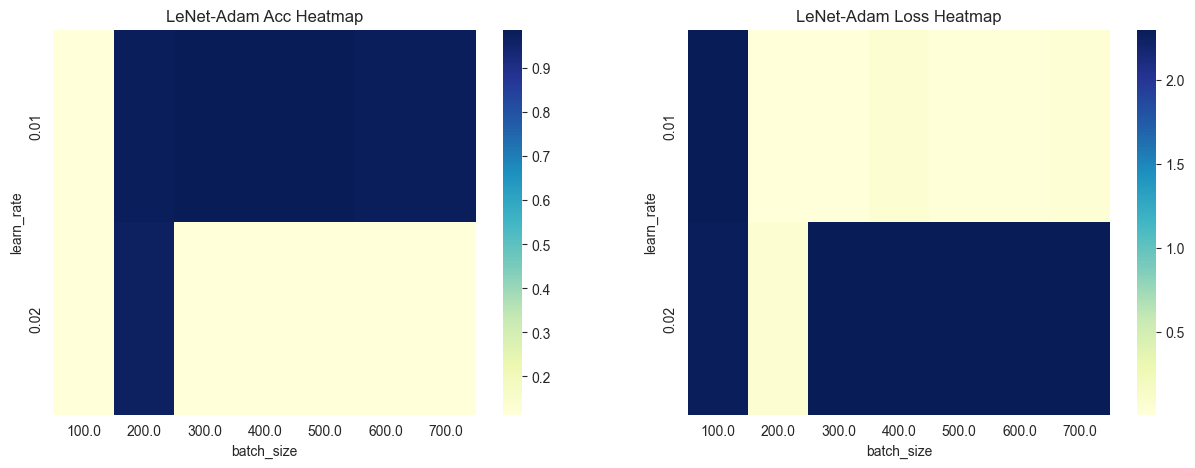

In [8]:
import os

import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

learn_rates = []
batch_sizes = []
losses = []
accs = []

files = os.listdir('.')
for f in files:
    if not f.endswith('.txt'):
        continue

    res = re.match(r'.*?-.*?-(.*?)-(.*?)-.*', f)
    learn_rate, batch_size = float(res[1]), float(res[2])
    learn_rates.append(learn_rate)
    batch_sizes.append(batch_size)

    with open(f) as _f:
        res = re.findall(r"\{'loss': \[(.*?)], 'acc': (.*?)}", ''.join(_f.readlines()))[0]
        # print(res)
        loss, acc = float(res[0]), float(res[1])
        losses.append(loss)
        accs.append(acc)


df = pd.DataFrame({
    'learn_rate': learn_rates,
    'batch_size': batch_sizes,
    'loss': losses,
    'acc': accs
})

df

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
mat = df.pivot(index='learn_rate', columns='batch_size', values='acc')
# print(mat)
# plt.heatmap(mat)
sns.heatmap(mat, cmap='YlGnBu')
plt.title('LeNet-Adam Acc Heatmap')

plt.subplot(1, 2, 2)
mat = df.pivot(index='learn_rate', columns='batch_size', values='loss')
# print(mat)
# plt.heatmap(mat)
sns.heatmap(mat, cmap='YlGnBu')
plt.title('LeNet-Adam Loss Heatmap')
plt.show()